In [18]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# STATS 306
## Homework 3:  Advanced `dplyr` and tidy data

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Why so delayed? (4 points)
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to work with times and date data using the `lubridate` package.)

In [21]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

**(a)** Make a bar plot of the proportion of flights each week whose actual departure time is NOT missing. The x-axis of your plot should contain the weeks of the year, ranging from 1 to 52, and the y-axis of your plot should be a number between 0 and 1 showing the decimal proportion of flights that have a departure time. What sort of plot geometry (line, bar, point, histogram, etc.) do you think is appropriate for this kind of plot? Does anything about this plot jump out at you? What and why? *1 point*

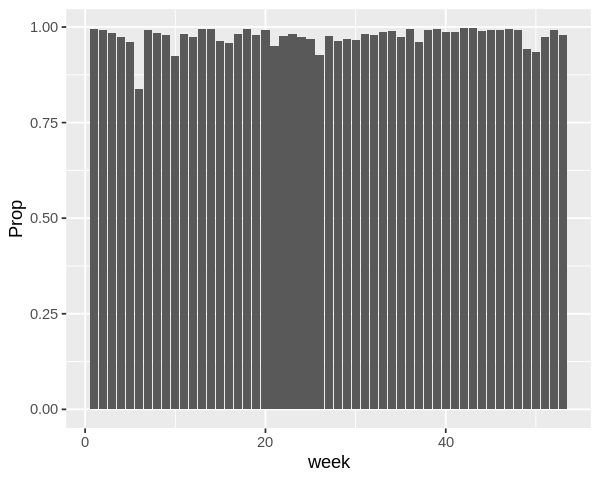

In [22]:
# Your solution here




flights_week|>
  group_by(week)|>
  summarize(Prop = sum(!is.na(dep_delay))/n())|>
  ggplot(flights_week, mapping = aes(x = week, y = Prop))+
  geom_bar(stat = "identity")
  

  


**(b)** For the week with the highest fraction of missing departure times, generate a table which shows the proportion of missing departure times for each day of that week. Your table should have columns `year`, `month`, `day`, and `prop_miss_dep_time`. Sort your table in chronological order and store it in a variable called `table1b`. *1 point*

In [84]:
# Your solution here


table1b <- 
  flights_week|>
    filter(week == 6)|>
    group_by(year, month, day)|>
    summarize(prop_miss_dep_time = sum(!is.na(dep_delay))/n())|>print()
    
    
     
   

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


# A tibble: 7 × 4
# Groups:   year, month [1]
   year month   day prop_miss_dep_time
  <int> <int> <int>              <dbl>
1  2013     2     5              0.982
2  2013     2     6              0.991
3  2013     2     7              0.996
4  2013     2     8              0.492
5  2013     2     9              0.425
6  2013     2    10              0.969
7  2013     2    11              0.921


**(c)** 2 days in `table1b` should jump out at you. What you're discovering from the data is the [North American Blizzard of 2013](https://en.wikipedia.org/wiki/February_2013_North_American_blizzard). Many flights were cancelled due to extreme weather conditions. Identify the proportion of cancelled flights out of LaGuardia Airport (LGA) during the days that jumped out at you for each airline carrier in descending order. *1 point*

In [89]:
# Your solution here

flights_week|>
  filter(year == 2013, month == 2, day %in% c(8,9), origin == 'LGA')|>
  group_by(carrier)|>
  summarize(cancelled = sum(is.na(dep_delay))/n())|>
  arrange(desc(cancelled))|>
  print()
 



# A tibble: 12 × 2
   carrier cancelled
   <chr>       <dbl>
 1 YV          1    
 2 9E          0.667
 3 DL          0.612
 4 MQ          0.6  
 5 UA          0.562
 6 US          0.559
 7 FL          0.524
 8 B6          0.5  
 9 EV          0.5  
10 F9          0.5  
11 WN          0.444
12 AA          0.431


**(d)** In your own words, summarize your findings from the previous exercises. Most importantly, comment on which airlines were the most and least cautious in terms of flight cancellations. Can you think of any reason why this might be? *1 point*

## Problem 2: Graduate school admissions (4 points)
This problem studies a built-in dataset called `UCBAdmissions`. It contains graduate school admissions data from 1973 for six departments at UC Berkeley:

In [65]:
data(UCBAdmissions)
ucb <- as_tibble(UCBAdmissions) %>% print

# A tibble: 24 × 4
   Admit    Gender Dept      n
   <chr>    <chr>  <chr> <dbl>
 1 Admitted Male   A       512
 2 Rejected Male   A       313
 3 Admitted Female A        89
 4 Rejected Female A        19
 5 Admitted Male   B       353
 6 Rejected Male   B       207
 7 Admitted Female B        17
 8 Rejected Female B         8
 9 Admitted Male   C       120
10 Rejected Male   C       205
# … with 14 more rows


(For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.)

# **(a)**
Using the tool we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have 5 columns: `Department`, `Gender`, `Admitted`, `Rejected`, and `Proportion Admitted`. Store it in a variable called `table3a`. *1 point*

<table>
<thead><tr><th scope="col">Department</th><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>A</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
		<tr><td>B</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
			<tr><td>B</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
				<tr><td>C</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
					<tr><td>C</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
						<tr><td>D</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
							<tr><td>D</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
								<tr><td>E</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>E</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

In [66]:
# Your solution here

table3a<-ucb|>pivot_wider( names_from = Admit, values_from = n)|>
  mutate(Proportion_Admitted = Admitted/(Admitted+Rejected))|>
  print()
  

# A tibble: 12 × 5
   Gender Dept  Admitted Rejected Proportion_Admitted
   <chr>  <chr>    <dbl>    <dbl>               <dbl>
 1 Male   A          512      313              0.621 
 2 Female A           89       19              0.824 
 3 Male   B          353      207              0.630 
 4 Female B           17        8              0.68  
 5 Male   C          120      205              0.369 
 6 Female C          202      391              0.341 
 7 Male   D          138      279              0.331 
 8 Female D          131      244              0.349 
 9 Male   E           53      138              0.277 
10 Female E           94      299              0.239 
11 Male   F           22      351              0.0590
12 Female F           24      317              0.0704


**(b)**
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to part (a) `table3a`. Was the overall proportion of men admitted statistically different from that of women? Perform an appropriate test and interpret your findings. What do these result suggest about admissions practices at UC Berkeley in the early 1970s? *1 point*

(Hint: use the `prop.test()` function.)

In [ ]:
# You solution here



**(c)**
Reproduce the table from Problem 1, but now stratify by department. 
Compute the male and female acceptance proportion for each department separately. *1 point*

Your resulting table should look like:


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male_Proportion_Admitted</th><th scope="col">Female_Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>

(Again, a few table entries have been provided to help you check your work, and it is your job to provide code that computes the entire table automatically.)

In [ ]:
# Your solution here

**(d)**
Do the department-level findings in part (c) agree or disagree with what you concluded in part (b)? Which departments agree with your conclusion in part (b) and which disagree? **Explain with numerical evidence for full credit.** *1 point*

In [ ]:
# Your solution here

## Problem 3: Popular Baby Names of the Decade (2 points)
Recall from lecture the `babynames` dataset that contains a lot of information about frequency of baby names over time.

In [90]:
install.packages("babynames")
library(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**(a)** Generate a table that has **decade** on the vertical axis, and the most popular male **and** female name of each decade. A decade will be definied by the years ___0 - ___9. So for example, 1880-1889 is a decade followed by 1890-1899, etc. *1 point*

Hint: The `cut()` function can be used to "discretize" a continuous variable by placing each continuous observation into a bin. For example:

In [ ]:
v = 1:10  # vector of the numbers 1 through 10
cut(v, breaks=c(0, 5, 10))

converts the vector $v=(1, \dots, 10)$ into a *factor* (discrete variable) that has two levels: $(0,5]$ and $(5, 10]$.

In [ ]:
# Your solution here

**(b)** Do any names appear more than once? Write code that converts the table from part (a) into a dataframe with all the names that show up more than once. **Manual answers will not receive credit. Your code should automatically convert the table to a new one showing the duplicated names.** *1 point*

In [ ]:
# Your solution here